### Market Baseline Performance

In [1]:
# Import required libraries
import numpy as np
import pandas as pd

### Buy-and-Hold Performance

In [2]:
# Import price data
df = pd.read_csv('prices.txt', engine='python', sep='   ', header=None, names=[f"stock{i}" for i in range(50)])

In [3]:
df_focus = df.copy()

# Remove all rows except start and end, as if we bought and held all the way
drop_rows = [i for i in range(1, 499)]
df_focus = df_focus.drop(drop_rows).T
df_focus.rename(columns={0: "start", 499: "end"}, inplace=True)

df_focus.head()

,start,end
stock0,13.46,13.40
stock1,71.65,67.33
stock2,48.46,46.72
stock3,50.52,45.73
stock4,52.10,52.30


In [6]:
df_focus['Profit'] = df_focus['end'] - df_focus['start']
df_focus['ROI'] = (df_focus['end'] - df_focus['start']) / df_focus['start']
df_focus.head()

,start,end,Profit,ROI
stock0,13.46,13.40,-0.06,-0.004458
stock1,71.65,67.33,-4.32,-0.060293
stock2,48.46,46.72,-1.74,-0.035906
stock3,50.52,45.73,-4.79,-0.094814
stock4,52.10,52.30,0.20,0.003839


In [5]:
total_profit = df_focus['Profit'].sum()
average_profit = df_focus['Profit'].mean()
total_returns = df_focus['end'].sum() / df_focus['start'].sum() - 1

print(f"=== Overall Buy-and-Hold Performance (1 stock each) ===")
print(f"Total Profit = ${total_profit:.2f}")
print(f"Average Profit = ${average_profit:.2f}")
print(f"Total Returns = {total_returns:.2f}%")

=== Overall Buy-and-Hold Performance (1 stock each) ===
Total Profit = $18.40
Average Profit = $0.37
Total Returns = 0.01%


### Market Portfolio Time-Series

<Axes: >

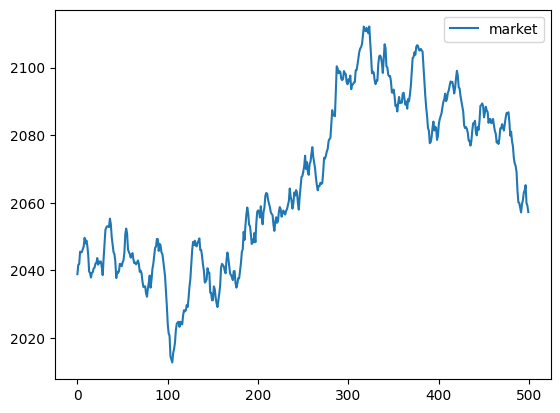

In [26]:
df_market = df.copy()

# Make a new market basket column
df_market['market'] = df.sum(axis=1)
df_market = df_market.drop(columns=[f"stock{i}" for i in range(50)])
df_market.plot()

In [27]:
df_market['daily return'] = df_market['market'].pct_change()

(1 + df_market['daily return']).cumprod() - 1


0           NaN
1      0.001368
2      0.001462
3      0.003276
4      0.003144
         ...   
495    0.012188
496    0.012934
497    0.010359
498    0.009952
499    0.009025
Name: daily return, Length: 500, dtype: float64